In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


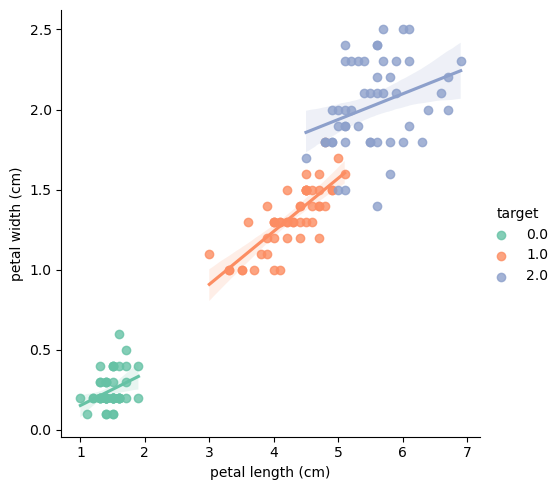

In [26]:
sns.lmplot(df, x = 'petal length (cm)',y = 'petal width (cm)', hue = 'target', palette = 'Set2')

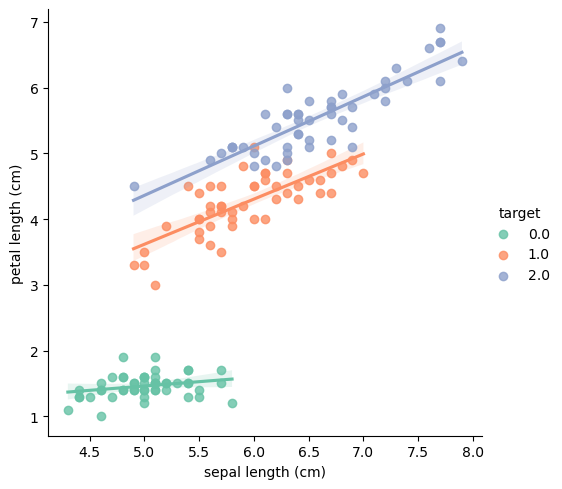

In [28]:
sns.lmplot(df, x = 'sepal length (cm)',y = 'petal length (cm)', hue = 'target', palette = 'Set2')

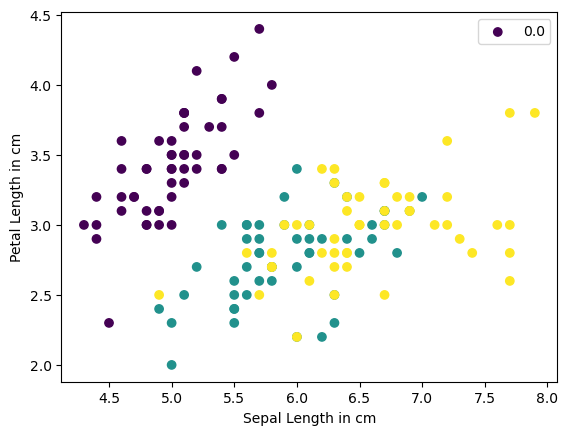

In [20]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c = df['target'])
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.show()

In [44]:
x = np.array(df.iloc[:,0:4])
y = np.array(df['target'])


In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 30)

In [61]:
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred= model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [74]:
result = {}
for i in range(2,5):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train,y_train)
    score = accuracy_score(y_test,y_pred)
    comparision = (y_pred==y_test)
    result[i] = [score,comparision.sum()]
for k,v in result.items():
    print(f'Neighbors: {k}, Score:{v[0]}, Correctly_Predicted: {v[1]}' )

Neighbors: 2, Score:0.9333333333333333, Correctly_Predicted: 42
Neighbors: 3, Score:0.9333333333333333, Correctly_Predicted: 42
Neighbors: 4, Score:0.9333333333333333, Correctly_Predicted: 42


In [70]:
comparision = (y_pred==y_test)
comparision

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [71]:
comparision.sum()

42